# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

**Business understanding**
* The Ames Housing Dataset contains information about home sales in Ames, Iowa between 2006 and 2010.
* we aim to explore different aspects and like house ages and overall quality of the houses and their effects on house prices

In [22]:
# checking the available directories
!dir

 Volume in drive C has no label.
 Volume Serial Number is F6F9-FBB9

 Directory of C:\Users\USER\Documents\Flatiron\dsc-pandas-eda-lab

01/20/2025  08:21 PM    <DIR>          .
01/20/2025  07:12 PM    <DIR>          ..
01/20/2025  07:12 PM               136 .canvas
01/20/2025  07:12 PM    <DIR>          .github
01/20/2025  07:12 PM                66 .gitignore
01/20/2025  07:13 PM    <DIR>          .ipynb_checkpoints
01/20/2025  07:12 PM                96 .learn
01/20/2025  07:12 PM             1,846 CONTRIBUTING.md
01/20/2025  07:12 PM    <DIR>          data
01/20/2025  07:12 PM    <DIR>          env
01/20/2025  07:12 PM    <DIR>          images
01/20/2025  08:21 PM            53,358 index.ipynb
01/20/2025  07:12 PM             1,354 LICENSE.md
01/20/2025  07:12 PM            11,766 README.md
01/20/2025  07:12 PM             4,857 splitter.py
               8 File(s)         73,479 bytes
               7 Dir(s)  411,582,513,152 bytes free


In [64]:
import pandas as pd
data= pd.read_csv('data/data_description.txt', lineterminator="\n", on_bad_lines='skip')
data

,MSSubClass: Identifies the type of dwelling involved in the sale.\t\r
0,\r
1,20\t1-STORY 1946 & NEWER ALL STYLES\r
2,30\t1-STORY 1945 & OLDER\r
3,40\t1-STORY W/FINISHED ATTIC ALL AGES\r
4,45\t1-1/2 STORY - UNFINISHED ALL AGES\r
...,...
510,\r
511,Normal\tNormal Sale\r
512,AdjLand\tAdjoining Land Purchase\r
513,Family\tSale between family members\r


## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [23]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [86]:
# loading the ames dataset
df= pd.read_csv('data/ames.csv', index_col=0 )
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [30]:
#Checking to confirm the type of df
type(df)

pandas.core.frame.DataFrame

In [31]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [127]:
# checking the whole dataframe
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69


In [126]:
# checking for datatypes , number of entries, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

In [40]:
#getting the  Saleprice column from the dataframe
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [150]:
df['SalePrice'].mean()

180921.19589041095

In [92]:
#Creating a function that creats histograms to avoid repetition and hard-coding.

def plot_hist(df, column, title, xlabel, ylabel):
    #creating the data('saleprice') column to be plotted
    data = df[column]
    # using python mean() to find the average saleprice
    mean = data.mean()
    # Set up plot and setting the size to (10,10)
    fig, ax = plt.subplots(figsize=(10,10))
    # Plot histogram, setting bins to auto because the function will be used to creat more plots
    ax.hist(data, bins= 60)
    # Plot vertical line and set colour to black
    ax.axvline(mean, linewidth=4, color="black")
    # Creating title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return plot_hist



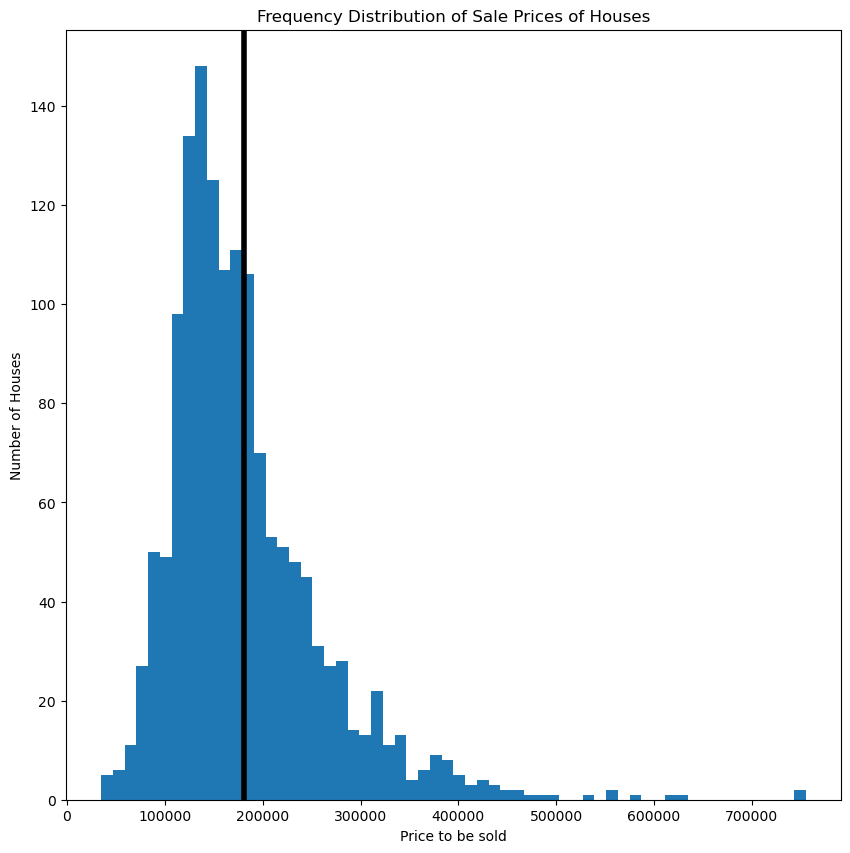

In [128]:
# using the created function to plot
plot_hist(
    df,
    "SalePrice", # column tobe plotted
    "Frequency Distribution of Sale Prices of Houses",#setting plto title
    "Price to be sold",#setting the xlabel
    "Number of Houses"#setting the y label
)
plt.show()

Now, print out the mean, median, and standard deviation:

In [68]:
#creating a function to calculate mean, median and mode in order to avoid repetition when needing to do similar calculations 
# using python's .mean(), .median() and .std()
def mean_median_std(df, column):
    print('Mean is', df[column].mean())
    print('Median is', df[column].median())
    print('Standard deviation is', df[column].std())
    return mean_median_std

In [69]:
mean_median_std(df, "SalePrice")

Mean is 180921.19589041095
Median is 163000.0
Standard deviation is 79442.50288288663


<function __main__.mean_median_std(df, column)>

In the cell below, interpret the above information.

In [174]:
# interpreting the 'SalePrice' statistics
"""
Average sale price of Houses is about $180921.19589041095
Median House price is $163000. Signifying that the distribution was normal
the standard deviation from the mean house price was 79442.50288288663$, 
There may be outliers in the dataset, some houses have a price of over $700000
the sale price is skewed to the right
The cheapest house sold for about 30000$ while the most expensive seems to have sold for over $755000
"""

'\nAverage sale price of Houses is about $180921.19589041095\nMedian House price is $163000. Signifying that the distribution was normal\nthe standard deviation from the mean house price was 79442.50288288663$, \nThere may be outliers in the dataset, some houses have a price of over $700000\nthe sale price is skewed to the right\nThe cheapest house sold for about 30000$ while the most expensive seems to have sold for over $755000\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

In [71]:
# previewing the TotRmsAbvGrd column
df['TotRmsAbvGrd']


Id
1       8
2       6
3       6
4       7
5       9
       ..
1456    7
1457    7
1458    9
1459    5
1460    6
Name: TotRmsAbvGrd, Length: 1460, dtype: int64

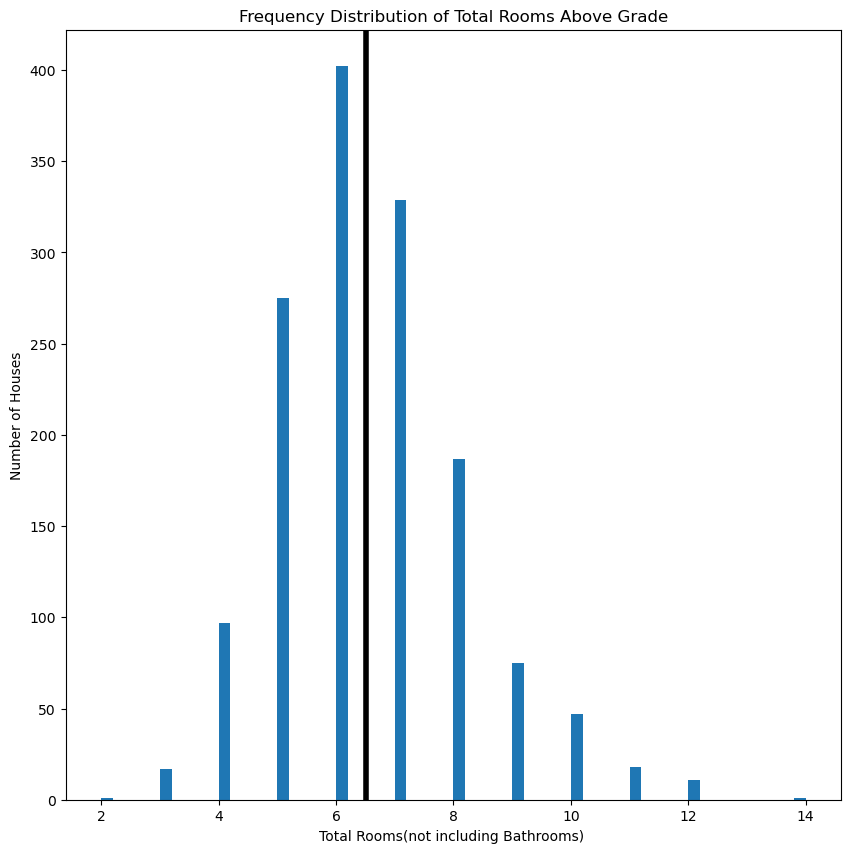

In [129]:
#Histogram of TotRmsAbvGrd using the function, plot_hist() created
plot_hist(
    df,
    "TotRmsAbvGrd",# column to be plotted
    "Frequency Distribution of Total Rooms Above Grade",# plot title
    "Total Rooms(not including Bathrooms) ",#xlabel
    "Number of Houses"#ylabel
)
plt.show()

Now, print out the mean, median, and standard deviation:

In [73]:
# using the created function mean_median_std()
mean_median_std(df, "TotRmsAbvGrd")

Mean is 6.517808219178082
Median is 6.0
Standard deviation is 1.625393290584064


<function __main__.mean_median_std(df, column)>

In the cell below, interpret the above information.

In [172]:
# Replace None with appropriate text
"""
Average rooms above grade are 6.517808219178082
Median rooms above grade is 6
The distribution is more symetric because the mean is 6.5 rooms and median is 6 rooms are almost equal
Standard deviation of 1.6 rooms indicates that the data is more around the center creating a more normal distribution
Some houses have more than double the mean rooms .
Houses with more than 4-9 rooms not including bathrooms is seen to have had more units sold
"""

'\nAverage rooms above grade are 6.517808219178082\nMedian rooms above grade is 6\nThe distribution is more symetric because the mean is 6.5 rooms and median is 6 rooms are almost equal\nStandard deviation of 1.6 rooms indicates that the data is more around the center creating a more normal distribution\nSome houses have more than double the mean rooms .\nHouses with more than 4-9 rooms not including bathrooms is seen to have had more units sold\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

In [74]:
# previewing the column 'OverallCond'
df['OverallCond']

Id
1       5
2       8
3       5
4       5
5       5
       ..
1456    5
1457    6
1458    9
1459    6
1460    6
Name: OverallCond, Length: 1460, dtype: int64

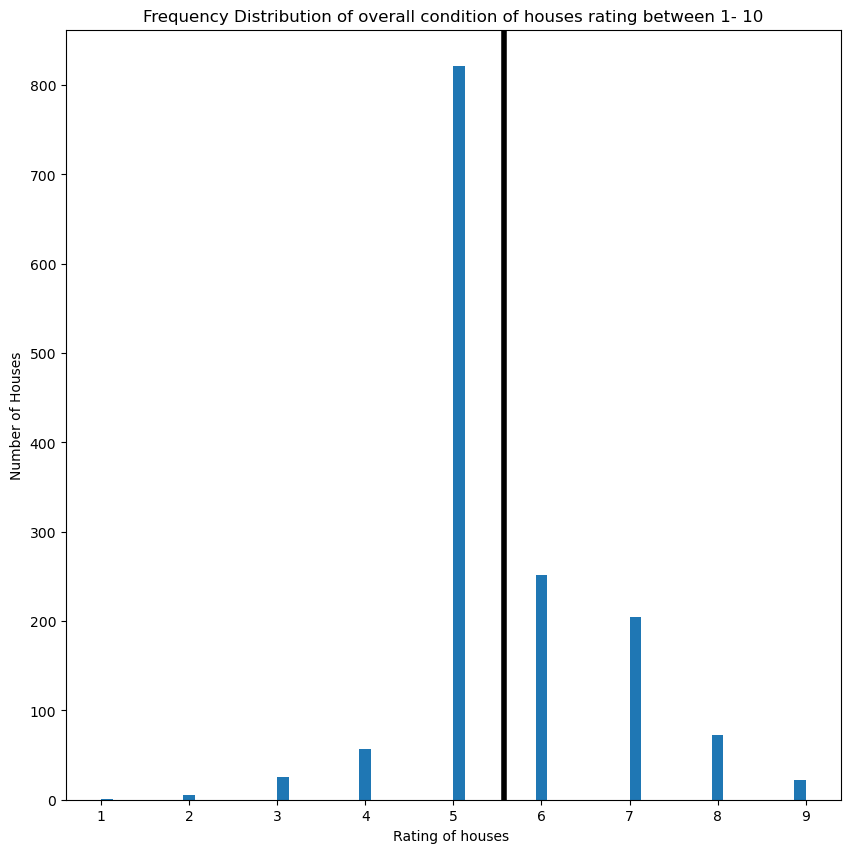

In [130]:
# creating a histogram of the rates of overall condition of the house 10 being highest and 1 being the lowest
plot_hist(
    df,
    "OverallCond", # column to be plotted
    "Frequency Distribution of overall condition of houses rating between 1- 10",# plot title
    "Rating of houses ",#xlabel
    "Number of Houses"#ylabel
)
plt.show()

Now, print out the mean, median, and standard deviation:

In [77]:
# using the created mean_median_std()
mean_median_std(df, "OverallCond")

Mean is 5.575342465753424
Median is 5.0
Standard deviation is 1.1127993367127367


<function __main__.mean_median_std(df, column)>

In the cell below, interpret the above information.

In [171]:
# Replace None with appropriate text
"""
The mean overall condition rating of the houses are above avarage with a rating of 5.6
There are more houses whose rating is above average.
The overall condition seems to influence the selling price of the house
"""

'\nThe mean overall condition rating of the houses are above avarage with a rating of 5.6\nThere are more houses whose rating is above average.\nThe overall condition seems to influence the selling price of the house\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [120]:
#previewing categorical data columns
categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [119]:
# selecting the categorical data into subsets depending on the rating of their overall condition
below_average_condition = df[df['OverallCond']< 5]
average_condition = df[df['OverallCond']== 5]
above_average_condition = df[df['OverallCond']> 5]

The following code checks that you created the subsets correctly:

In [82]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

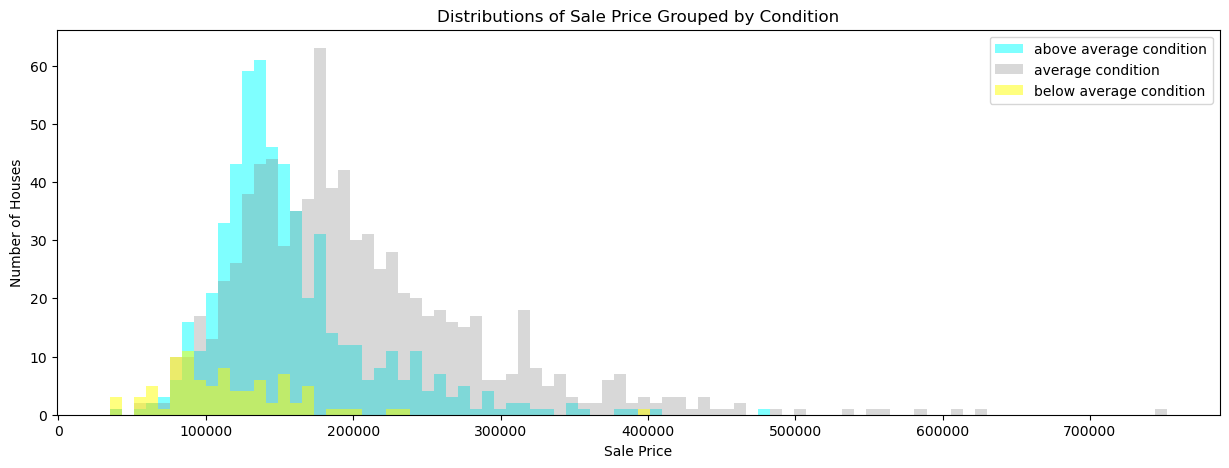

In [131]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist( # above_average_condition plot
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(# average_condition plot
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(# below_average condition plot
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")# plot title
ax.set_xlabel("Sale Price")#x label
ax.set_ylabel("Number of Houses")# y label
ax.legend()
plt.show()

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [167]:
# intepreting the plot
"""
Houses of average condition seem to have higher sale price than those above average condition.
The average condition houses sold at a minimum of about 100000$ and exceeded 750000$ maximum.
The dataset is positively skewed with outliers in all house conditions
The mean sale price of above average condition houses is lower than of average condition houses.
It can be seen that the overall house condition has no significant effect on the saleprice as the average condition houses seem to sale for higher prices than the above average condition houses
"""

'\nHouses of average condition seem to have higher sale price than those above average condition.\nThe average condition houses sold at a minimum of about 100000$ and exceeded 750000$ maximum.\nThe dataset is positively skewed with outliers in all house conditions\nThe mean sale price of above average condition houses is lower than of average condition houses.\nIt can be seen that the overall house condition has no significant effect on the saleprice as the average condition houses seem to sale for higher prices than the above average condition houses\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [114]:
#finding out the types of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [117]:
#selecting numeric columns
numeric_columns= df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Age'],
      dtype='object')

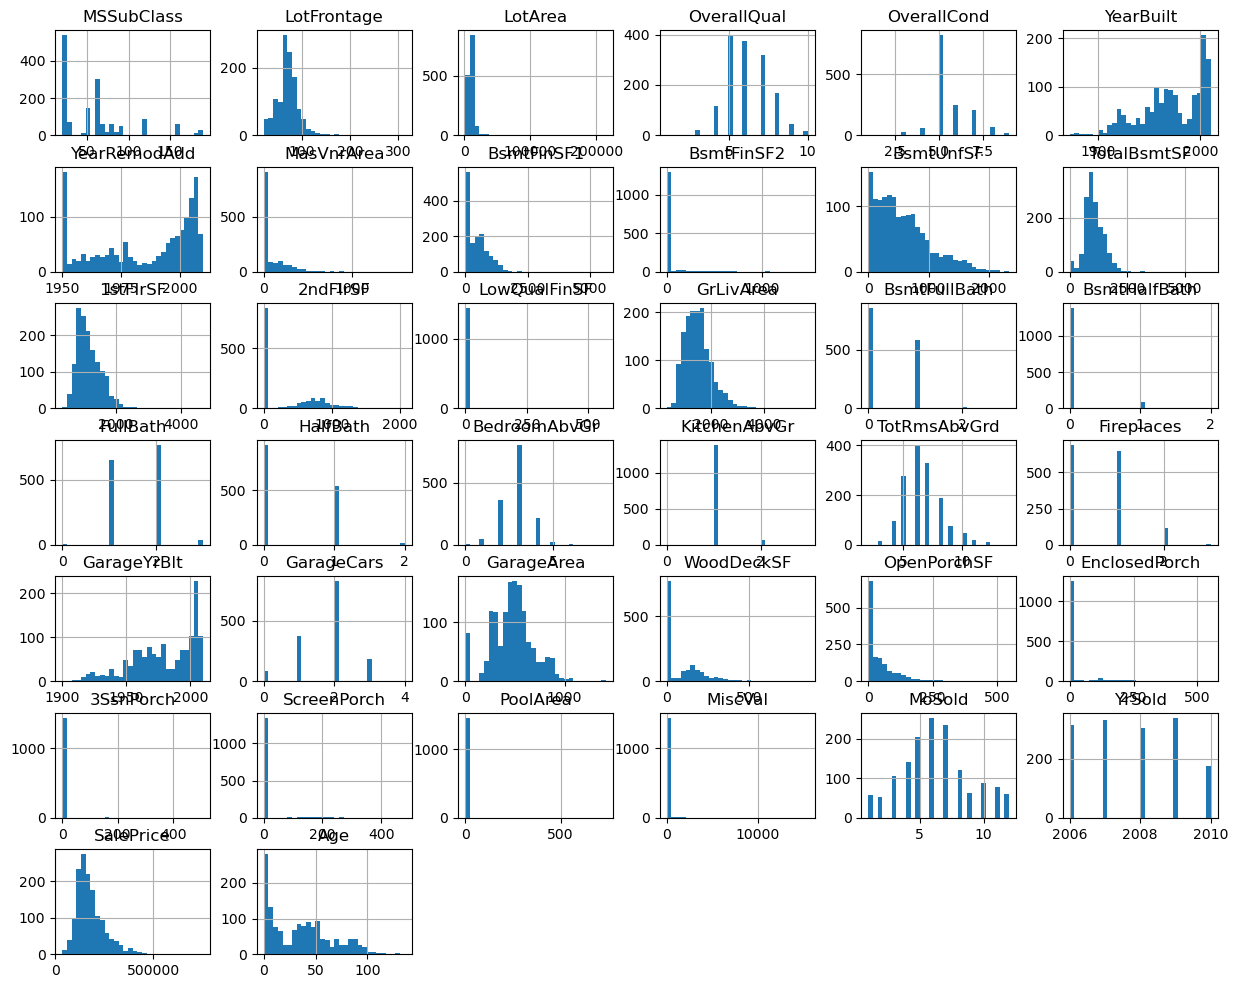

In [115]:
# visualizing numeric columns using a histogram
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 12), bins=30)
plt.show()
                                                     

In [123]:
#showing corellations between the numeric columns
corr_numeric_columns=df[numeric_columns].corr()
corr_numeric_columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.028746
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,-0.122848
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014832
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.572629
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.377325
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-0.999036
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.590360
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,-0.315562
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.248483
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.050422


In [163]:
#showing the values and columns of numeric data and how they correlate in ascending order
correlations = df.corr(numeric_only = True)['SalePrice'].sort_values()
correlations

Age             -0.523350
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [98]:
# using pandas
#define numeric only so as to select only the columns with numeric values
#Using the.sort_values()so as to select from the lowest to highest values
correlations = df.corr(numeric_only = True)['SalePrice'].sort_values()
# use the second last element because the highest correlation of 1:1 is Saleprice to itself
most_correlated = correlations.iloc[-2]
most_correlated_column = correlations.index[-2]

In [96]:
print('most correlated',  most_correlated)
print('most correlated column',  most_correlated_column)

most correlated 0.7909816005838053
most correlated column OverallQual


Now, find the ***most negatively correlated*** column:

In [161]:
# using pandas
#define numeric only so as to select only the columns with numeric values
#Using the.sort_values()so as to select from the lowest to highest values
correlations = df.corr(numeric_only = True)['SalePrice'].sort_values()
# use the first element because the lowest correlation asthe values were sorted from lowest to highest
least_correlated = correlations.iloc[0]
least_correlated_column = correlations.index[0]

In [101]:
print('least correlated',  least_correlated)
print('least correlated column',  least_correlated_column)

least correlated -0.13590737084214105
least correlated column KitchenAbvGr


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

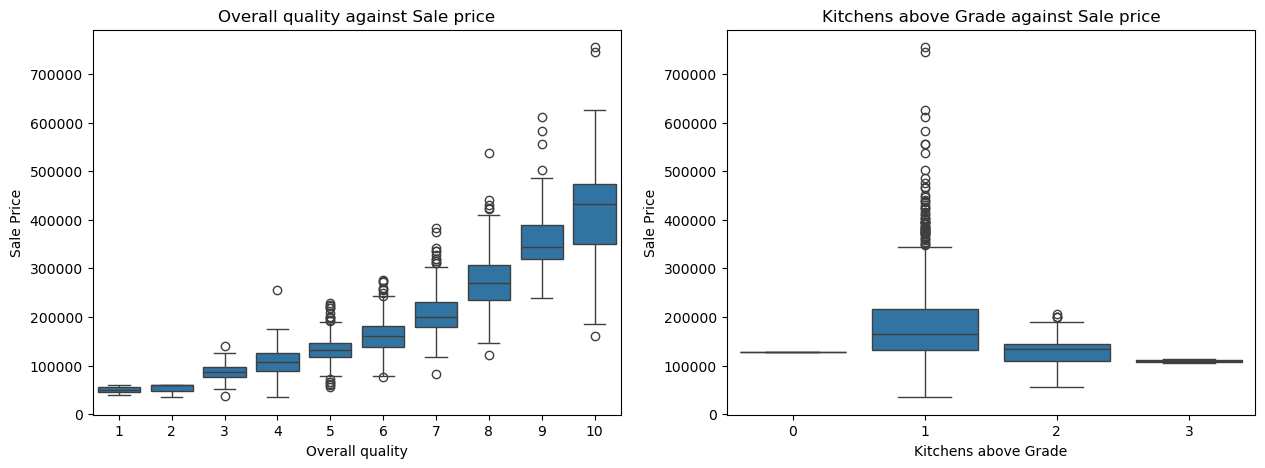

In [152]:
# creating a boxplot to visualize correlations

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Overall quality against Sale price')
ax1.set_xlabel('Overall quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Kitchens above Grade against Sale price')
ax2.set_xlabel('Kitchens above Grade')
ax2.set_ylabel("Sale Price")
plt.show()


Interpret the results below. Consult `data/data_description.txt` as needed.

In [166]:
#loading the description text dataset
with open('data/data_description.txt',  mode='r', encoding='cp1252') as f:
    description_data= f.readlines()
    #print(description_data)
for cols in description_data:# iterating through the description_data
    print(cols)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [168]:
# Replace None with appropriate text
"""
The most positively correlated value to Saleprice is the Overall quality with 0.7909816005838053
OverallQual reffers to the Rates the overall material and finish of the house. 
Ratings are from very excellent to very poor.
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
Homes with very excellent rating sold for averagely 400000$ and the sale prices reduced with reduction in rating and overal material and finish of the house.
It is just tosay that overall quality and finish had a big impact on the sale prices
	


the least correlated value to Saleprice is Kitchens above Grade
From the description text , KitchenAbvGr: Kitchens above grade...
From the plot, houses with one kitchen had the best sale price.
It is suprising to see that houses with no kitchens had better sale price than those with 3kitchens.
I suppose no one needs 3 kitchens in their homes.
"""

'\nThe most positively correlated value to Saleprice is the Overall quality with 0.7909816005838053\nOverallQual reffers to the Rates the overall material and finish of the house. \nRatings are from very excellent to very poor.\n       10\tVery Excellent\n       9\tExcellent\n       8\tVery Good\n       7\tGood\n       6\tAbove Average\n       5\tAverage\n       4\tBelow Average\n       3\tFair\n       2\tPoor\n       1\tVery Poor\nHomes with very excellent rating sold for averagely 400000$ and the sale prices reduced with reduction in rating and overal material and finish of the house.\nIt is just tosay that overall quality and finish had a big impact on the sale prices\n\t\n\n\nthe least correlated value to Saleprice is Kitchens above Grade\nFrom the description text , KitchenAbvGr: Kitchens above grade...\nFrom the plot, houses with one kitchen had the best sale price.\nIt is suprising to see that houses with no kitchens had better sale price than those with 3kitchens.\nI suppose no

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [109]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

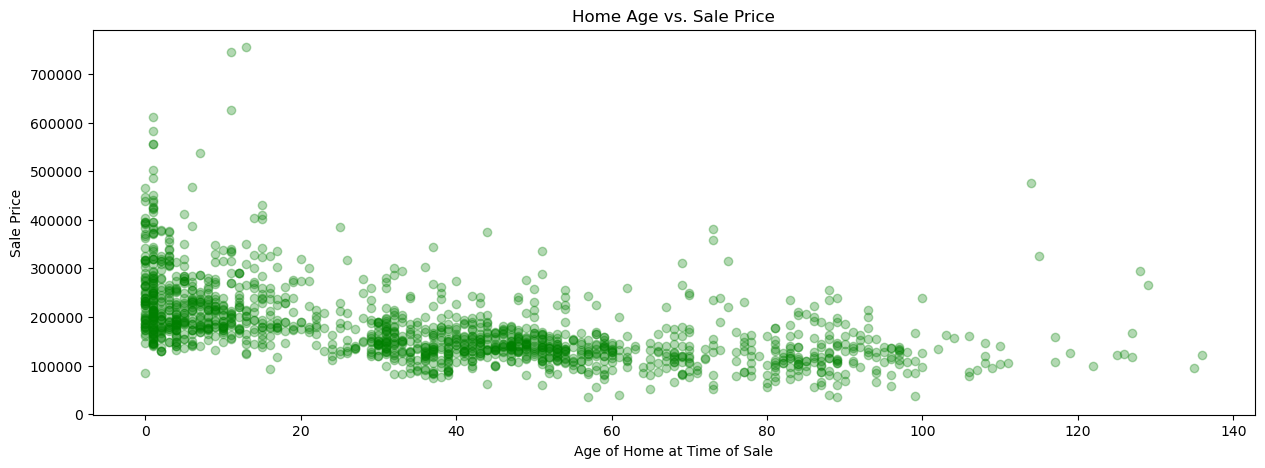

In [112]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price")
plt.show()

Interpret this plot below:

In [170]:
# Replace None with appropriate text
"""
Newer houses appear to have more value compared to older ones.
There seems to be a gap between year 19 to year 28 in sales.
After year 60, theres significantly a reduction in sales of houses. 
Past 100 years fewer houses appear to be sold and the sale prices appear to be diverse also.
With age sale prices significantly dropped and so did number of units sold. Probably because of the overall condition of the houses which detorariate with age.
"""

'\nNewer houses appear to have more value compared to older ones.\nThere seems to be a gap between year 19 to year 28 in sales.\nAfter year 60, theres significantly a reduction in sales of houses. \nPast 100 years fewer houses appear to be sold and the sale prices appear to be diverse also.\nWith age sale prices significantly dropped and so did number of units sold. Probably because of the overall condition of the houses which detorariate with age.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.

**CONCLUSSION**

* From the analysis we find that the Overall condition of the houses played a big role in determining their sale price, it would be of interest to see whether remodelling also played a role in the prices.​

* I would therefore recommend that:​

  1. Older houses be remodelled and newer materials used to significantly increase the sale prices​

   2. Houses with more than two kitchens convert the extra kitchens to living area.​

   3.  Older houses can be priced lowly to attract more buyers.​